In [21]:
import multiprocessing
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from concurrent.futures import ThreadPoolExecutor

warnings.filterwarnings("ignore")

In [22]:
# Number of Cores: 16 for Predator Helios 300 (i7 10th gen)
numberOfCores = multiprocessing.cpu_count()
print("Num of cores are: ", numberOfCores)

Num of cores are:  16


In [23]:
# Function for multiplying two matrices
def matrix_multiply(mat1, mat2):
    return np.dot(mat1, mat2)

In [24]:
# Function to perform matrix multiplications
def perform_matrix_multiplications(num_matrices, matrix_size, constant_matrix):
    results = []
    for _ in range(num_matrices):
        random_matrix = np.random.rand(*matrix_size)
        result = matrix_multiply(random_matrix, constant_matrix)
        results.append(result)
    return results

In [25]:
def main(num_threads):
    matrix_size = (2000, 2000)
    num_matrices = 100
    constant_matrix = np.random.rand(*matrix_size)

    # Start time 
    start_time = time.time()

    # Perform matrix multiplications with specified number of threads
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = executor.map(
            perform_matrix_multiplications,
            [num_matrices // num_threads] * num_threads,
            [matrix_size] * num_threads,
            [constant_matrix] * num_threads
        )

    # End time measurement
    end_time = time.time()
    total_time = end_time - start_time

    # Flatten the results list
    results = [result for sublist in results for result in sublist]

    print(f"Number of results: {len(results)}")
    print(f"Total time taken with {num_threads} threads: {total_time:.4f} seconds")
    return total_time


Number of results: 100
Total time taken with 1 threads: 22.3730 seconds
Number of results: 100
Total time taken with 2 threads: 20.5300 seconds
Number of results: 99
Total time taken with 3 threads: 20.1622 seconds
Number of results: 100
Total time taken with 4 threads: 19.4487 seconds
Number of results: 100
Total time taken with 5 threads: 15.3526 seconds
Number of results: 96
Total time taken with 6 threads: 14.7502 seconds
Number of results: 98
Total time taken with 7 threads: 16.6480 seconds
Number of results: 96
Total time taken with 8 threads: 15.1118 seconds
Number of results: 99
Total time taken with 9 threads: 13.6380 seconds
Number of results: 100
Total time taken with 10 threads: 14.4529 seconds
Number of results: 99
Total time taken with 11 threads: 14.1589 seconds
Number of results: 96
Total time taken with 12 threads: 14.1435 seconds
Number of results: 91
Total time taken with 13 threads: 13.1409 seconds
Number of results: 98
Total time taken with 14 threads: 14.0773 seco

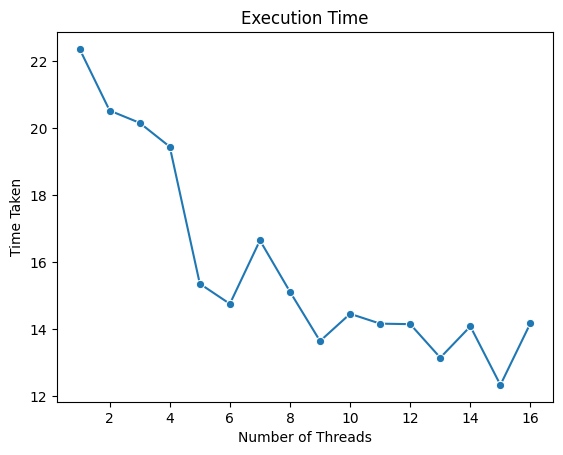

In [26]:
num_threads = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
tt = []
for i in range(0, len(num_threads)):
    tt.append(main(num_threads[i]))

sns.lineplot(x=num_threads, y=tt, marker='o')
plt.title('Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.show()